# Group Project
## Group #3
### Auto.am

In the framework of Business Analytics course, our group (Hermine Grigoryan, Lilia Mamikonyan and Gor Khachatryan) decided to work on the data from Armenia auto.am website. Usually, owners of automobiles do not know how to set the price of their cars when putting it on sale in auto.am and whether or not their car will be sold. We have found a solution to this problem by using machine learning techniques learned within the framework of this course. 

In order to provide an optimal solution, we first have scraped the data about Toyota cars from auto.am which includes variables, describing different Toyota models, like their year, model name, country where the car currently is, price, custom, payment option, mileage, hand drive and body type. 

Besides using Python, we used Excel as a data cleaning tool to separate some of the descriptive variables and to bring some numeric variables to their correct formats. (The comments from the cleaning part in Excel can be found in the Excel file, called scraped_data1). 

To find out whether the car will be sold or not, we have scraped the same data twice with the difference of 1 week. As a result, around 1,000 cars were sold. Hence, we have created a new binary variable called “Purchased” using Excel’s VLOOKUP function to compare the old data with the new one.

After importing the ready data into Python, we have deleted the variables that do not contain important information, encoded all categorical variables and dealt with outliers.


In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# we will use magic to avoid calling plt.show() everytime
%matplotlib inline

In [530]:
auto = pd.read_excel("Auto.am_Final.xlsx")

In [531]:
auto.head()

,CarModel,CarYear,DatePosted,Difference_Date,Country,Price,Custom,Payment_Option,Mileage,Hand_Drive,Body_Type,Purchased
0,ToyotaVitz,2005,2018-05-10,6,Հայաստան,1.000000,մաքսազերծված_է,ամբողջական_վճարում,74564.543040,Ձախ,Սեդան,No
1,ToyotaCamry,2008,2018-05-10,6,ԱՄՆ,1400.000000,մաքսազերծված_չէ,ամբողջական_վճարում,3168.993079,Ձախ,Ամենագնաց,No
2,ToyotaDuet,2001,2018-05-10,6,Հայաստան,1443.298969,մաքսազերծված_է,ամբողջական_վճարում,8076.582754,Ձախ,Սեդան,No
3,ToyotaCamry,2009,2018-05-10,6,ԱՄՆ,1900.000000,մաքսազերծված_չէ,ամբողջական_վճարում,86991.966880,Ձախ,Ունիվերսալ,No
4,ToyotaCamry,2009,2018-05-10,6,ԱՄՆ,1950.000000,մաքսազերծված_չէ,ամբողջական_վճարում,60894.376816,Ձախ,Սեդան,No


In [532]:
auto = auto.drop("DatePosted", axis=1)
auto = auto.drop("Difference_Date", axis=1)

In [533]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 10 columns):
CarModel          6699 non-null object
CarYear           6699 non-null int64
Country           6698 non-null object
Price             5559 non-null float64
Custom            6699 non-null object
Payment_Option    6699 non-null object
Mileage           6699 non-null float64
Hand_Drive        6699 non-null object
Body_Type         6699 non-null object
Purchased         6699 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 523.4+ KB


In [534]:
auto.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CarYear,6699.0,2010.976265,4.163880,1985.000000,2008.0,2011.000000,2014.0,2018.0
Price,5559.0,7372.717851,6427.465090,1.000000,3600.0,5700.000000,9200.0,125000.0
Mileage,6699.0,75008.160400,52154.304502,6.213712,40000.0,69593.573504,101000.0,811179.0


In [535]:
auto.Price.mean()

7372.71785142696

In [536]:
auto.tail(15)

,CarModel,CarYear,Country,Price,Custom,Payment_Option,Mileage,Hand_Drive,Body_Type,Purchased
6684,ToyotaCamry,2013,ԱՄՆ,NaN,մաքսազերծված_չէ,ամբողջական_վճարում,58529.000000,Ձախ,Սեդան,Yes
6685,ToyotaRav4,2017,ԱՄՆ,NaN,մաքսազերծված_չէ,ամբողջական_վճարում,34000.000000,Ձախ,Սեդան,Yes
6686,ToyotaCamry,2009,ԱՄՆ,1650.0,մաքսազերծված_չէ,ամբողջական_վճարում,124274.238400,Ձախ,Սեդան,Yes
6687,ToyotaCamry,2012,ԱՄՆ,3000.0,մաքսազերծված_չէ,ամբողջական_վճարում,4349.598344,Ձախ,Սեդան,Yes
6688,ToyotaCamry,2012,ԱՄՆ,NaN,մաքսազերծված_չէ,ամբողջական_վճարում,46000.000000,Ձախ,Սեդան,Yes
6689,ToyotaLandCruiserPrado,2008,Հայաստան,5400.0,մաքսազերծված_է,ամբողջական_վճարում,102000.000000,Ձախ,Սեդան,Yes
6690,ToyotaLandCruiser100,2000,Հայաստան,12500.0,մաքսազերծված_է,ամբողջական_վճարում,178000.000000,Ձախ,Սեդան,Yes
6691,ToyotaCorolla,2013,Հայաստան,15000.0,մաքսազերծված_է,ամբողջական_վճարում,55758.000000,Ձախ,Սեդան,Yes
6692,ToyotaAvensis,2006,Հայաստան,4600.0,մաքսազերծված_է,ամբողջական_վճարում,116889.000000,Աջ,Սեդան,Yes
6693,ToyotaHarrier,2003,Հայաստան,7500.0,մաքսազերծված_է,ամբողջական_վճարում,73101.000000,Աջ,Սեդան,Yes


In [537]:
auto.loc[auto.Price.isnull(), 'Price'] = auto.groupby(['CarModel', 'CarYear']).Price.transform('mean') #excelov el stugeci, chishta hashvel

In [538]:
auto.tail(15) 

,CarModel,CarYear,Country,Price,Custom,Payment_Option,Mileage,Hand_Drive,Body_Type,Purchased
6684,ToyotaCamry,2013,ԱՄՆ,7563.515152,մաքսազերծված_չէ,ամբողջական_վճարում,58529.000000,Ձախ,Սեդան,Yes
6685,ToyotaRav4,2017,ԱՄՆ,13036.363636,մաքսազերծված_չէ,ամբողջական_վճարում,34000.000000,Ձախ,Սեդան,Yes
6686,ToyotaCamry,2009,ԱՄՆ,1650.000000,մաքսազերծված_չէ,ամբողջական_վճարում,124274.238400,Ձախ,Սեդան,Yes
6687,ToyotaCamry,2012,ԱՄՆ,3000.000000,մաքսազերծված_չէ,ամբողջական_վճարում,4349.598344,Ձախ,Սեդան,Yes
6688,ToyotaCamry,2012,ԱՄՆ,7072.112713,մաքսազերծված_չէ,ամբողջական_վճարում,46000.000000,Ձախ,Սեդան,Yes
6689,ToyotaLandCruiserPrado,2008,Հայաստան,5400.000000,մաքսազերծված_է,ամբողջական_վճարում,102000.000000,Ձախ,Սեդան,Yes
6690,ToyotaLandCruiser100,2000,Հայաստան,12500.000000,մաքսազերծված_է,ամբողջական_վճարում,178000.000000,Ձախ,Սեդան,Yes
6691,ToyotaCorolla,2013,Հայաստան,15000.000000,մաքսազերծված_է,ամբողջական_վճարում,55758.000000,Ձախ,Սեդան,Yes
6692,ToyotaAvensis,2006,Հայաստան,4600.000000,մաքսազերծված_է,ամբողջական_վճարում,116889.000000,Աջ,Սեդան,Yes
6693,ToyotaHarrier,2003,Հայաստան,7500.000000,մաքսազերծված_է,ամբողջական_վճարում,73101.000000,Աջ,Սեդան,Yes


In [539]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 10 columns):
CarModel          6699 non-null object
CarYear           6699 non-null int64
Country           6698 non-null object
Price             6675 non-null float64
Custom            6699 non-null object
Payment_Option    6699 non-null object
Mileage           6699 non-null float64
Hand_Drive        6699 non-null object
Body_Type         6699 non-null object
Purchased         6699 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 523.4+ KB


There are NA-s in Price because the value for some CarModels with unique years were also null. For example, there was only 1 observation for Toyota4-Runner with year=2002. And the value for price was NA, that is why python imputted NA as the mean for this category. There are not much this kind of observations, and now we will dropp all the NA values from our dataset.


In [540]:
auto_new = auto.dropna()

In [541]:
auto_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 6698
Data columns (total 10 columns):
CarModel          6674 non-null object
CarYear           6674 non-null int64
Country           6674 non-null object
Price             6674 non-null float64
Custom            6674 non-null object
Payment_Option    6674 non-null object
Mileage           6674 non-null float64
Hand_Drive        6674 non-null object
Body_Type         6674 non-null object
Purchased         6674 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 573.5+ KB


In [542]:
auto_new = auto_new[auto_new.Price > 1000]

In [543]:
auto_new.head()

,CarModel,CarYear,Country,Price,Custom,Payment_Option,Mileage,Hand_Drive,Body_Type,Purchased
1,ToyotaCamry,2008,ԱՄՆ,1400.000000,մաքսազերծված_չէ,ամբողջական_վճարում,3168.993079,Ձախ,Ամենագնաց,No
2,ToyotaDuet,2001,Հայաստան,1443.298969,մաքսազերծված_է,ամբողջական_վճարում,8076.582754,Ձախ,Սեդան,No
3,ToyotaCamry,2009,ԱՄՆ,1900.000000,մաքսազերծված_չէ,ամբողջական_վճարում,86991.966880,Ձախ,Ունիվերսալ,No
4,ToyotaCamry,2009,ԱՄՆ,1950.000000,մաքսազերծված_չէ,ամբողջական_վճարում,60894.376816,Ձախ,Սեդան,No
5,ToyotaCorolla,2010,ԱՄՆ,2100.000000,մաքսազերծված_չէ,ամբողջական_վճարում,74564.543040,Ձախ,Ամենագնաց,No


In [544]:
auto_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6620 entries, 1 to 6698
Data columns (total 10 columns):
CarModel          6620 non-null object
CarYear           6620 non-null int64
Country           6620 non-null object
Price             6620 non-null float64
Custom            6620 non-null object
Payment_Option    6620 non-null object
Mileage           6620 non-null float64
Hand_Drive        6620 non-null object
Body_Type         6620 non-null object
Purchased         6620 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 568.9+ KB


In [545]:
auto_new.CarYear = auto_new.CarYear.astype(str)

In [546]:
#separate numeric and object variables
data_numeric = auto_new.select_dtypes(exclude="object")

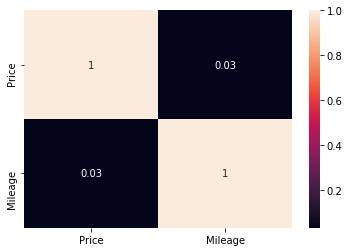

In [547]:
#the plot shows that there is almost no correlation between numeric variables
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)

In [548]:
#create a function to normalize the data
def my_scaler(col):
  return (col - np.min(col))/(np.max(col)-np.min(col))

#apply that function to each column of the dataframe
data_scaled = data_numeric.apply(my_scaler)

In [549]:
data_scaled.head()

,Price,Mileage
1,0.002824,0.003899
2,0.003173,0.009949
3,0.006858,0.107235
4,0.007261,0.075062
5,0.008471,0.091914


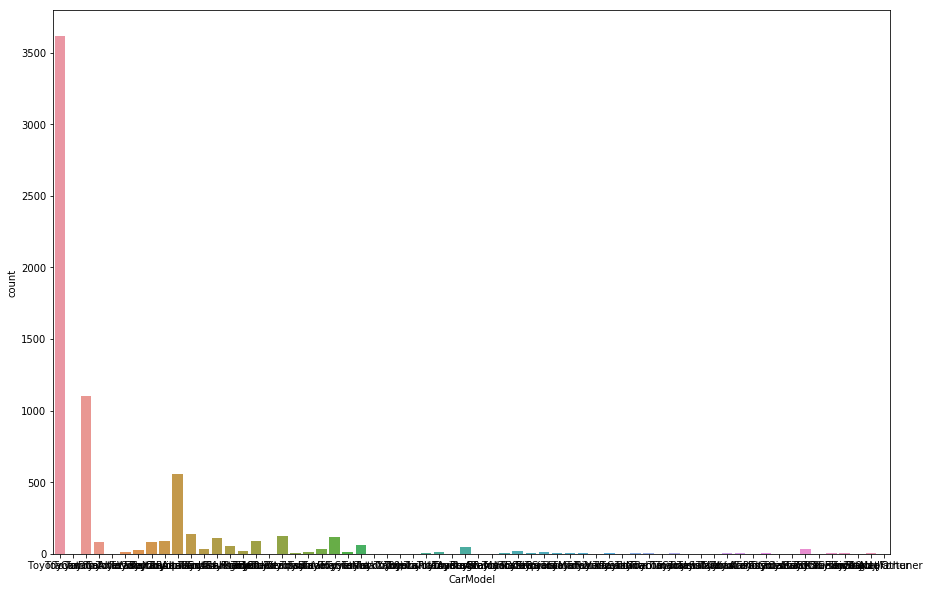

In [550]:
plt.figure(figsize=(15,10))
sns.countplot(auto_new.CarModel)

In [551]:
print(len(auto_new.CarModel.unique()))
print(auto_new.CarModel.unique())

64
['ToyotaCamry' 'ToyotaDuet' 'ToyotaCorolla' 'ToyotaAltezza' 'ToyotaWish'
 'ToyotaBelta' 'ToyotaYaris' 'ToyotaPrius' 'ToyotaAlphard' 'ToyotaRav4'
 'ToyotaLandCruiserPrado' 'ToyotaLandCruiser100' 'Toyota4-Runner'
 'ToyotaHighlander' 'ToyotaFJCruiser' 'ToyotaVitz' 'ToyotaVerossa'
 'ToyotaIpsum' 'ToyotaBlade' 'ToyotaVoxy' 'ToyotaHarrier' 'ToyotaSienna'
 'ToyotaIst' 'ToyotaMarkX(10)' 'ToyotaCrown' 'ToyotaBrevis' 'Toyota'
 'ToyotaPlatz' 'ToyotaLandCruiser80' 'ToyotaAvensis' 'ToyotaProgres'
 'ToyotaAvalon' 'ToyotaGrandHiace' 'ToyotaMarkXZiO' 'ToyotaEstima'
 'ToyotaSequoia' 'ToyotaSienta' 'ToyotaScion' 'ToyotaMark2' 'ToyotaHilux'
 'ToyotaVenza' 'ToyotaRaum' 'ToyotaCaldina' 'ToyotaNoah' 'ToyotaTacoma'
 'ToyotaTundra' 'ToyotaCurren' 'ToyotaIsis' 'ToyotaSolara' 'ToyotaMatrix'
 'ToyotaWindom' 'ToyotaAristo' 'ToyotaPasso' 'ToyotaLandCruiser70'
 'ToyotaCelica' 'ToyotaHiace' 'ToyotaGT86' 'ToyotaLandCruiser200'
 'ToyotaCelsior' 'ToyotaFuncargo' 'ToyotaStarlet' 'ToyotaNadia'
 'ToyotaԱյլ/Օther' 'Toyo

In [552]:
auto_new.CarModel.value_counts()

ToyotaCamry               3615
ToyotaCorolla             1104
ToyotaRav4                 560
ToyotaLandCruiserPrado     135
ToyotaIpsum                124
ToyotaSienna               115
Toyota4-Runner             113
ToyotaAlphard               91
ToyotaVitz                  87
ToyotaAltezza               85
ToyotaPrius                 82
ToyotaMarkX(10)             58
ToyotaHighlander            52
ToyotaAvalon                49
ToyotaLandCruiser200        34
ToyotaHarrier               34
ToyotaLandCruiser100        32
ToyotaYaris                 30
ToyotaSequoia               22
ToyotaFJCruiser             19
ToyotaVoxy                  16
ToyotaIst                   14
ToyotaBelta                 13
ToyotaScion                 11
ToyotaAvensis               11
ToyotaTundra                 9
ToyotaEstima                 9
ToyotaMark2                  7
ToyotaBlade                  6
ToyotaIsis                   6
                          ... 
ToyotaSienta                 4
ToyotaHi

In [553]:
#getting dummies for car models
model = pd.get_dummies(auto_new.CarModel)
model = model.ix[:, ["ToyotaCamry", "ToyotaCorolla","ToyotaRav4", "ToyotaLandCruiserPrado", "ToyotaIpsum", "ToyotaSienna", "Toyota4-Runner"]]
model.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,ToyotaCamry,ToyotaCorolla,ToyotaRav4,ToyotaLandCruiserPrado,ToyotaIpsum,ToyotaSienna,Toyota4-Runner
1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0


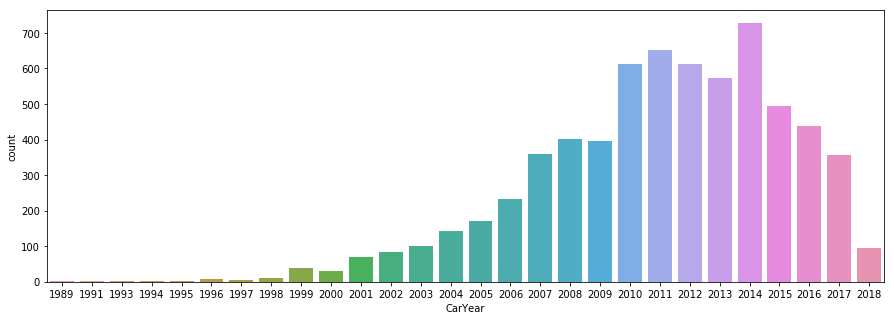

In [554]:
plt.figure(figsize=(15,5))
sns.countplot(auto_new.CarYear)

In [555]:
auto_new.CarYear.unique()

array(['2008', '2001', '2009', '2010', '2011', '2012', '2015', '2014',
       '2013', '2003', '2004', '2005', '2016', '2017', '2007', '1999',
       '2018', '2006', '2000', '2002', '1998', '1994', '1993', '1995',
       '1996', '1997', '1991', '1989'], dtype=object)

In [556]:
auto_new.CarYear.value_counts()

2014    728
2011    651
2010    613
2012    612
2013    574
2015    495
2016    438
2008    401
2009    396
2007    360
2017    357
2006    232
2005    172
2004    144
2003    100
2018     94
2002     84
2001     69
1999     38
2000     31
1998     11
1996      9
1997      4
1995      2
1994      2
1989      1
1991      1
1993      1
Name: CarYear, dtype: int64

In [345]:
year = pd.get_dummies(auto_new.CarYear)
year = year.ix[:, ["2014", "2011","2010", "2012", "2013", "2015", "2016", "2008", "2009", "2007", "2017"]]
year.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,2014,2011,2010,2012,2013,2015,2016,2008,2009,2007,2017
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,0


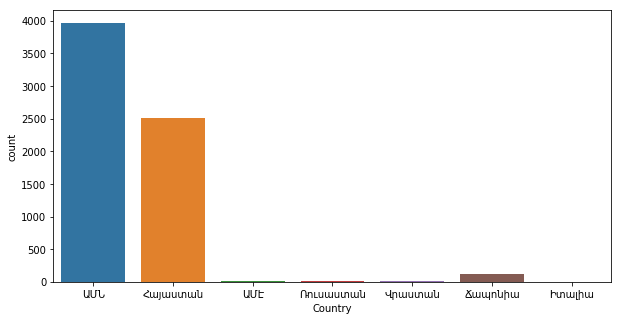

In [346]:
plt.figure(figsize=(10,5))
sns.countplot(auto_new.Country)

In [347]:
auto_new.Country.unique()

array(['ԱՄՆ', 'Հայաստան', 'ԱՄԷ', 'Ռուսաստան', 'Վրաստան', 'Ճապոնիա',
       'Իտալիա'], dtype=object)

In [349]:
#getting dummies for countries
country = pd.get_dummies(auto_new.Country)
country = country.drop(["Իտալիա", "ԱՄԷ", "Ռուսաստան", "Վրաստան"], axis=1)
country = country.rename(columns={"ԱՄՆ":"USA_Location", "Հայաստան":"Armenia_Location", "Ճապոնիա":"Japan_Location"})
country.head()

,USA_Location,Armenia_Location,Japan_Location
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0


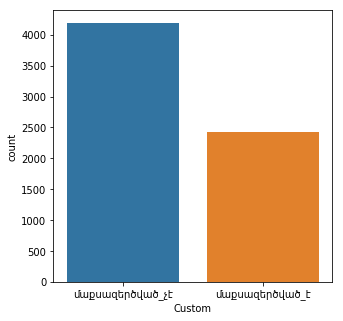

In [350]:
plt.figure(figsize=(5,5))
sns.countplot(auto_new.Custom)

In [351]:
#getting dummies for custom
custom = pd.get_dummies(auto_new.Custom)
custom = custom.drop(["մաքսազերծված_չէ"], axis=1)
custom = custom.rename(columns={"մաքսազերծված_է":"Custom"}) #1-Yes, 0-No
custom.head()

,Custom
1,0
2,1
3,0
4,0
5,0


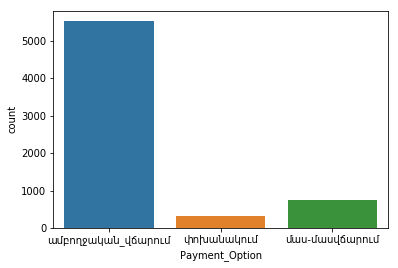

In [352]:
sns.countplot(auto_new.Payment_Option)

In [353]:
#getting dummies for payment options
payment = pd.get_dummies(auto_new.Payment_Option)
payment = payment.drop(["մաս-մասվճարում", "փոխանակում"], axis=1)
payment = payment.rename(columns={"ամբողջական_վճարում":"Full_Payment", "փոխանակում":"Exchanging_Auto"})
payment.head()

,Full_Payment
1,1
2,1
3,1
4,1
5,1


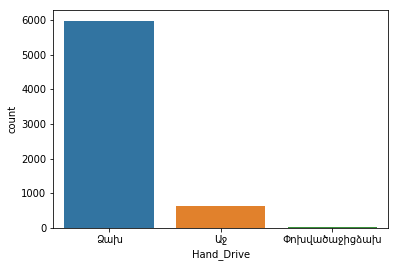

In [354]:
sns.countplot(auto_new.Hand_Drive)

In [355]:
auto_new.Hand_Drive.unique()

array(['Ձախ', 'Աջ', 'Փոխվածաջիցձախ'], dtype=object)

In [356]:
#getting dummies for hand drive
hand = pd.get_dummies(auto_new.Hand_Drive)
hand = hand.drop(["Փոխվածաջիցձախ", "Աջ"], axis=1)
hand = hand.rename(columns={"Ձախ":"Hand_Drive"}) #1 for left hand drive, 0 for others
hand.head()

,Hand_Drive
1,1
2,1
3,1
4,1
5,1


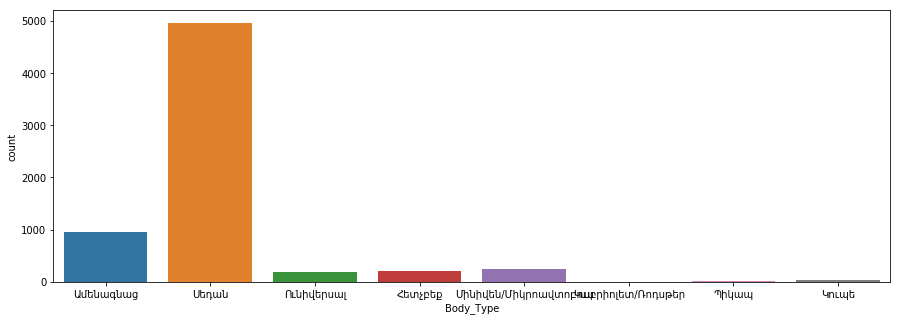

In [357]:
plt.figure(figsize=(15,5))
sns.countplot(auto_new.Body_Type)

In [358]:
auto_new.Body_Type.unique()

array(['Ամենագնաց', 'Սեդան', 'Ունիվերսալ', 'Հետչբեք',
       'Մինիվեն/Միկրոավտոբուս', 'Կաբրիոլետ/Ռոդսթեր', 'Պիկապ', 'Կուպե'],
      dtype=object)

In [359]:
#getting dummies for body types of cars
body = pd.get_dummies(auto_new.Body_Type)
body = body.drop(["Մինիվեն/Միկրոավտոբուս", 'Ունիվերսալ', 'Հետչբեք', 'Կաբրիոլետ/Ռոդսթեր','Պիկապ', 'Կուպե'], axis=1)
body = body.rename(columns={"Սեդան":"Sedan", "Ամենագնաց":"SUV/Truck"})
body.head()

,SUV/Truck,Sedan
1,1,0
2,0,1
3,0,0
4,0,1
5,1,0


In [360]:
#getting dummies for body types of cars
purch = pd.get_dummies(auto_new.Purchased)
purch = purch.drop(["No"], axis=1)
purch = purch.rename(columns={"Yes":"Purchased"})
purch.head()

,Purchased
1,0
2,0
3,0
4,0
5,0


In [361]:
new = auto_new.drop(["CarModel", "CarYear", "Country", "Custom", "Payment_Option", "Hand_Drive", "Body_Type", "Purchased"],axis=1)

In [362]:
new = new.join([model, year, country, custom, payment, hand, body, purch])

In [363]:
new_scaled = data_scaled.join([model, year, country, custom, payment, hand, body, purch])

# Predictive Analytics

## Predicting the price of Toyota cars

In [369]:
#Importing necessary libraries:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [370]:
#unscaled
y = new["Price"]
x = new.drop("Price",axis=1)

#scaled
Y = new_scaled["Price"]
X = new_scaled.drop("Price",axis=1)

In [371]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [372]:
model_tree = DecisionTreeRegressor(random_state=42)
model_linear = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)

In [373]:
#fitting the models (unscaled data)
model_tree.fit(x_train,y_train)
model_linear.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
model_gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

### Decision Tree (on unscaled data)

In [374]:
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(x_train,y_train)

print("Decision tree (default parameters)")
print("\n")
print("RMSE")
tree_p_0 = model_tree.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train, tree_p_0)), decimals=3))
tree_p = model_tree.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test, tree_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_tree.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_tree.score(x_test,y_test)*100,decimals=3))

Decision tree (default parameters)


RMSE
Train:  185.678
Test:  5194.756


Overall Accuracy
Train:  99.902
Test:  37.883


In [375]:
#GridSearch
from sklearn.model_selection import GridSearchCV
max_depth_values = [k for k in range(5,21)]
min_sample_values = [k for k in range(20, 400, 20)]
parameters = {"max_depth":max_depth_values, "min_samples_leaf":min_sample_values}
print(parameters)
finder=GridSearchCV(model_tree,parameters) 
print(finder)
finder.fit(x_train, y_train)
print(finder.best_params_)

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]}
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
{'max_depth': 13, 'min_samples_leaf': 40}


In [377]:
model_tree_20 = DecisionTreeRegressor(min_samples_leaf=20, random_state=42)
model_tree_20.fit(x_train,y_train)


print("Decision tree ('min_samples_leaf': 40)")
print("\n")
print("RMSE")
tree_p_0 = model_tree_20.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train, tree_p_0)), decimals=3))
tree_p = model_tree_20.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test, tree_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_tree_20.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_tree_20.score(x_test,y_test)*100,decimals=3))

Decision tree ('min_samples_leaf': 40)


RMSE
Train:  4021.502
Test:  4928.555


Overall Accuracy
Train:  53.799
Test:  44.086


In [378]:
#very low accuracy

In [380]:
model_tree_12 = DecisionTreeRegressor(max_depth=13, random_state=42)
model_tree_12.fit(x_train,y_train)


print("Decision tree ('max_depth': 14)")
print("\n")
print("RMSE")
tree_p_0 = model_tree_12.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train, tree_p_0)), decimals=3))
tree_p = model_tree_12.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test, tree_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_tree_12.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_tree_12.score(x_test,y_test)*100,decimals=3))

Decision tree ('max_depth': 14)


RMSE
Train:  2494.056
Test:  4649.177


Overall Accuracy
Train:  82.23
Test:  50.246


In [381]:
#overfitting

In [383]:
model_tree_12_20 = DecisionTreeRegressor(max_depth=13, min_samples_leaf=20, random_state=42)
model_tree_12_20.fit(x_train,y_train)


print("Decision tree ('max_depth': 12, 'min_samples_leaf': 20)")
print("\n")
print("RMSE")
tree_p_0 = model_tree_12_20.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train, tree_p_0)), decimals=3))
tree_p = model_tree_12_20.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test, tree_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_tree_12_20.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_tree_12_20.score(x_test,y_test)*100,decimals=3))

Decision tree ('max_depth': 12, 'min_samples_leaf': 20)


RMSE
Train:  4081.034
Test:  4936.339


Overall Accuracy
Train:  52.421
Test:  43.91


### Decision Tree (on normalized data)

In [384]:
model_tree_s = DecisionTreeRegressor(random_state=42)
model_tree_s.fit(X_train,Y_train)

print("SCALED Decision tree (default parameters)")
print("\n")
print("MSE")
tree_p_0_s = model_tree_s.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train, tree_p_0_s)), decimals=3))
tree_p_s = model_tree_s.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test, tree_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_tree_s.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_tree_s.score(X_test,Y_test)*100,decimals=3))

SCALED Decision tree (default parameters)


MSE
Train:  0.001
Test:  0.044


Overall Accuracy
Train:  99.901
Test:  31.288


In [385]:
#GridSearch
from sklearn.model_selection import GridSearchCV
max_depth_values = [k for k in range(5,21)]
min_sample_values = [k for k in range(20, 400, 20)]
parameters = {"max_depth":max_depth_values, "min_samples_leaf":min_sample_values}
print(parameters)
finder=GridSearchCV(model_tree_s,parameters) 
print(finder)
finder.fit(X_train, Y_train)
print(finder.best_params_)

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]}
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
{'max_depth': 13, 'min_samples_leaf': 40}


In [387]:
model_tree_20_S = DecisionTreeRegressor(min_samples_leaf=20, random_state=42)
model_tree_20_S.fit(X_train,Y_train)


print("SCALED Decision tree ('min_samples_leaf': 20)")
print("\n")
print("RMSE")
tree_p_0_s = model_tree_20_S.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train, tree_p_0)), decimals=3))
tree_p_s = model_tree_20_S.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test, tree_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_tree_20_S.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_tree_20_S.score(X_test,Y_test)*100,decimals=3))

SCALED Decision tree ('min_samples_leaf': 20)


RMSE
Train:  8579.898
Test:  0.04


Overall Accuracy
Train:  53.799
Test:  44.086


In [388]:
model_tree_12_S = DecisionTreeRegressor(max_depth=13, random_state=42)
model_tree_12_S.fit(X_train,Y_train)


print("SCALED Decision tree ('max_depth': 14)")
print("\n")
print("RMSE")
tree_p_0_s = model_tree_12_S.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train, tree_p_0_s)), decimals=3))
tree_p_s = model_tree_12_S.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test, tree_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_tree_12_S.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_tree_12_S.score(X_test,Y_test)*100,decimals=3))

SCALED Decision tree ('max_depth': 14)


RMSE
Train:  0.02
Test:  0.038


Overall Accuracy
Train:  82.23
Test:  48.6


In [390]:
model_tree_12_20_S = DecisionTreeRegressor(max_depth=13, min_samples_leaf=20, random_state=42)
model_tree_12_20_S.fit(X_train,Y_train)


print("SCALED Decision tree ('max_depth': 12, 'min_samples_leaf': 20)")
print("\n")
print("RMSE")
tree_p_0_s = model_tree_12_20_S.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train, tree_p_0_s)), decimals=3))
tree_p_s = model_tree_12_20_S.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test, tree_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_tree_12_20_S.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_tree_12_20_S.score(X_test,Y_test)*100,decimals=3))

SCALED Decision tree ('max_depth': 14, 'min_samples_leaf': 20)


RMSE
Train:  0.033
Test:  0.04


Overall Accuracy
Train:  52.421
Test:  43.91


The best model among decision trees turned out to be SCALED Decision tree ('max_depth': 12, 'min_samples_leaf': 20). It has no overfitting, the MSE is very low. However, the overall accuracy of the model is quite low.

## Linear Regression (on unscaled data)

In [391]:
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)

print("Linear Regression")
print("\n")
print("RMSE")
line_p_0 = model_linear.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,line_p_0)), decimals=3))
line_p = model_linear.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,line_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_linear.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_linear.score(x_test,y_test)*100,decimals=3))

Linear Regression


RMSE
Train:  4113.109
Test:  4994.679


Overall Accuracy
Train:  51.67
Test:  42.576


## Linear Regression (on scaled data)

In [212]:
from sklearn.preprocessing import StandardScaler

In [394]:
y = new["Price"]
x = new.drop("Price",axis=1)

In [395]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [396]:
scaler=StandardScaler()

scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [397]:
x_train = scaler.transform(x_train)

In [398]:
scaler.fit(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [399]:
x_test = scaler.transform(x_test)

In [400]:
model_linear_s = LinearRegression()
model_linear_s.fit(x_train,y_train)

print("Linear Regression")
print("\n")
print("RMSE")
line_p_0_s = model_linear_s.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,line_p_0_s)), decimals=3))
line_p_s = model_linear_s.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,line_p_s)), decimals=3))


print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_linear_s.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_linear_s.score(x_test,y_test)*100,decimals=3))  #????? why minus?

Linear Regression


RMSE
Train:  4113.109
Test:  5001.153


Overall Accuracy
Train:  51.67
Test:  42.427


## Random Forest (on unscaled data)

In [401]:
y = new["Price"]
x = new.drop("Price",axis=1)

In [402]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [403]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(x_train,y_train)

print("Random Forest")
print("RMSE")
rf_p_0 = model_rf.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,rf_p_0)), decimals=3))
rf_p = model_rf.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,rf_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_rf.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_rf.score(x_test,y_test)*100,decimals=3))

Random Forest
RMSE
Train:  1714.784
Test:  4624.76


Overall Accuracy
Train:  91.6
Test:  50.767


In [404]:
# Grid Search
from sklearn.model_selection import GridSearchCV
max_depth_values = [k for k in range(5,21)]
min_sample_values = [k for k in range(20, 400, 20)]
parameters = {"max_depth":max_depth_values, "min_samples_leaf":min_sample_values}
print(parameters)
finder=GridSearchCV(model_rf,parameters) 
print(finder)
finder.fit(x_train, y_train)

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]}
GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [405]:
print(finder.best_params_)

{'max_depth': 16, 'min_samples_leaf': 20}


In [428]:
model_rf_19 = RandomForestRegressor(max_depth=17, random_state=42)
model_rf_19.fit(x_train,y_train)

print("Random Forest (max_depth=17)")
print("\n")
print("RMSE")
rf_p_0 = model_rf_19.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,rf_p_0)), decimals=3))
rf_p = model_rf_19.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,rf_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_rf_19.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_rf_19.score(x_test,y_test)*100,decimals=3))

Random Forest (max_depth=17)


RMSE
Train:  2113.071
Test:  4465.419


Overall Accuracy
Train:  87.244
Test:  54.101


In [407]:
model_rf_20 = RandomForestRegressor(min_samples_leaf=20, random_state=42)
model_rf_20.fit(x_train,y_train)

print("Random Forest (min_samples_leaf=20)")
print("\n")
print("RMSE")
rf_p_0 = model_rf_20.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,rf_p_0)), decimals=3))
rf_p = model_rf_20.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,rf_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_rf_20.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_rf_20.score(x_test,y_test)*100,decimals=3))

Random Forest (min_samples_leaf=20)


RMSE
Train:  4112.565
Test:  4922.636


Overall Accuracy
Train:  51.683
Test:  44.221


In [408]:
model_rf_20_19 = RandomForestRegressor(min_samples_leaf=20, max_depth=19, random_state=42)
model_rf_20_19.fit(x_train,y_train)

print("Random Forest (min_samples_leaf=20)")
print("\n")
print("RMSE")
rf_p_0 = model_rf_20_19.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,rf_p_0)), decimals=3))
rf_p = model_rf_20_19.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,rf_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_rf_20_19.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_rf_20_19.score(x_test,y_test)*100,decimals=3))

Random Forest (min_samples_leaf=20)


RMSE
Train:  4112.593
Test:  4922.599


Overall Accuracy
Train:  51.682
Test:  44.221


## Random Forest (on normalized data)

In [429]:
model_rf_s = RandomForestRegressor(random_state=42)
model_rf_s.fit(X_train,Y_train)

print("Random Forest (scaled)")
print("\n")
print("RMSE")
rf_p_0_s = model_rf_s.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train,rf_p_0_s)), decimals=3))
rf_p_s = model_rf_s.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test,rf_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_rf_s.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_rf_s.score(X_test,Y_test)*100,decimals=3))  

Random Forest (scaled)


RMSE
Train:  0.014
Test:  0.037


Overall Accuracy
Train:  91.85
Test:  50.594


In [410]:
# Grid Search
max_depth_values = [k for k in range(5,21)]
min_sample_values = [k for k in range(20, 400, 20)]
parameters = {"max_depth":max_depth_values, "min_samples_leaf":min_sample_values}
print(parameters)
finder=GridSearchCV(model_rf_s,parameters) 
print(finder)
finder.fit(X_train, Y_train)
print(finder.best_params_)

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]}
GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
{'max_depth': 16

In [411]:
model_rf_19_S = RandomForestRegressor(max_depth=17,random_state=42)
model_rf_19_S.fit(X_train,Y_train)

print("Random Forest")
print("\n")
print("RMSE")
rf_p_0_s = model_rf_19_S.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train,rf_p_0_s)), decimals=3))
rf_p_s = model_rf_19_S.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test,rf_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_rf_19_S.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_rf_19_S.score(X_test,Y_test)*100,decimals=3))  #overfitting

Random Forest


RMSE
Train:  0.017
Test:  0.037


Overall Accuracy
Train:  87.184
Test:  52.045


In [412]:
model_rf_20_S = RandomForestRegressor(min_samples_leaf=20,random_state=42)
model_rf_20_S.fit(X_train,Y_train)

print("Random Forest")
print("\n")
print("RMSE")
rf_p_0_s = model_rf_20_S.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train,rf_p_0_s)), decimals=3))
rf_p_s = model_rf_20_S.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test,rf_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_rf_20_S.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_rf_20_S.score(X_test,Y_test)*100,decimals=3)) 

Random Forest


RMSE
Train:  0.033
Test:  0.04


Overall Accuracy
Train:  51.683
Test:  44.221


In [413]:
model_rf_20_14_S = RandomForestRegressor(min_samples_leaf=20, max_depth=14, random_state=42)
model_rf_20_14_S.fit(X_train,Y_train)

print("Random Forest")
print("\n")
print("RMSE")
rf_p_0_s = model_rf_20_14_S.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train,rf_p_0_s)), decimals=3))
rf_p_s = model_rf_20_14_S.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test,rf_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_rf_20_14_S.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_rf_20_14_S.score(X_test,Y_test)*100,decimals=3)) 

Random Forest


RMSE
Train:  0.034
Test:  0.04


Overall Accuracy
Train:  50.608
Test:  43.27


In [414]:
model_rf_19_S = RandomForestRegressor(max_depth=19, n_estimators=100, random_state=42)
model_rf_19_S.fit(X_train,Y_train)

print("Random Forest")
print("\n")
print("RMSE")
rf_p_0_s = model_rf_19_S.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train,rf_p_0_s)), decimals=3))
rf_p_s = model_rf_19_S.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test,rf_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_rf_19_S.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_rf_19_S.score(X_test,Y_test)*100,decimals=3))  #overfitting

Random Forest


RMSE
Train:  0.014
Test:  0.036


Overall Accuracy
Train:  90.784
Test:  54.775


In [415]:
#finding the important features
importances=model_rf_19_S.feature_importances_
features=pd.DataFrame(data=importances, columns=["importance"], index=x.columns)
features

,importance
Mileage,0.169059
ToyotaCamry,0.059695
ToyotaCorolla,0.030739
ToyotaRav4,0.017440
ToyotaLandCruiserPrado,0.050274
ToyotaIpsum,0.000366
ToyotaSienna,0.003757
Toyota4-Runner,0.017057
2014,0.036455
2011,0.011493


In [416]:
selected=features[features.importance>0.03] 
selected.sort_values(by="importance", ascending=False)

,importance
Mileage,0.169059
Custom,0.161970
Hand_Drive,0.085432
2017,0.060521
ToyotaCamry,0.059695
ToyotaLandCruiserPrado,0.050274
Armenia_Location,0.049171
2016,0.038067
2015,0.037942
Purchased,0.036933


In [417]:
selected_features=selected.index
X_train_new=X_train[selected_features]
X_test_new=X_test[selected_features]

In [418]:
model_rf_imp=RandomForestRegressor(max_depth=19, n_estimators=100, random_state=42) 
model_rf_imp.fit(X_train_new,Y_train)

print("Random Forest (max_depth=19, n_est=100, importances)")
print("Train: ", model_rf_imp.score(X_train_new,Y_train)*100)
print("Test: ", model_rf_imp.score(X_test_new,Y_test)*100)


Random Forest (max_depth=19, n_est=100, importances)
Train:  88.04468461253985
Test:  48.98150304176788


## Gradient Boosting (on unscaled data)

In [430]:
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(x_train,y_train)

print("Gradient Boosting (default parameters)")
print("\n")
print("RMSE")
gb_p_0 = model_gb.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,gb_p_0)), decimals=3))
gb_p = model_gb.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,gb_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_gb.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_gb.score(x_test,y_test)*100,decimals=3))

Gradient Boosting (default parameters)


RMSE
Train:  3677.691
Test:  4709.066


Overall Accuracy
Train:  61.361
Test:  48.956


In [431]:
model_gb = GradientBoostingRegressor(max_depth=14, random_state=42)
model_gb.fit(x_train,y_train)

print("Gradient Boosting (max_depth=14)")
print("\n")
print("RMSE")
gb_p_0 = model_gb.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,gb_p_0)), decimals=3))
gb_p = model_gb.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,gb_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_gb.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_gb.score(x_test,y_test)*100,decimals=3))

Gradient Boosting (max_depth=14)


RMSE
Train:  493.881
Test:  4904.272


Overall Accuracy
Train:  99.303
Test:  44.636


In [432]:
model_gb = GradientBoostingRegressor(min_samples_leaf=20, random_state=42)
model_gb.fit(x_train,y_train)

print("Gradient Boosting (max_depth=14)")
print("\n")
print("RMSE")
gb_p_0 = model_gb.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,gb_p_0)), decimals=3))
gb_p = model_gb.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,gb_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_gb.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_gb.score(x_test,y_test)*100,decimals=3))

Gradient Boosting (max_depth=14)


RMSE
Train:  3893.078
Test:  4682.045


Overall Accuracy
Train:  56.702
Test:  49.54


In [433]:
model_gb = GradientBoostingRegressor(min_samples_leaf=20, max_depth=14, random_state=42)
model_gb.fit(x_train,y_train)

print("Gradient Boosting (max_depth=14)")
print("\n")
print("RMSE")
gb_p_0 = model_gb.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,gb_p_0)), decimals=3))
gb_p = model_gb.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,gb_p)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_gb.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(model_gb.score(x_test,y_test)*100,decimals=3))

Gradient Boosting (max_depth=14)


RMSE
Train:  2812.338
Test:  4272.027


Overall Accuracy
Train:  77.405
Test:  57.991


## Gradient Boosting (on scaled data)

In [434]:
model_gb_s = GradientBoostingRegressor(random_state=42)
model_gb_s.fit(X_train,Y_train)

print("Gradient Boosting")
print("\n")
print("RMSE")
gb_p_0_s = model_gb_s.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train,gb_p_0_s)), decimals=3))
gb_p_s = model_gb_s.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test,gb_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_gb_s.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_gb_s.score(X_test,Y_test)*100,decimals=3))  

Gradient Boosting


RMSE
Train:  0.03
Test:  0.038


Overall Accuracy
Train:  61.361
Test:  48.957


In [435]:
model_gb_s = GradientBoostingRegressor(max_depth=5, random_state=42)
model_gb_s.fit(X_train,Y_train)

print("SCALED Gradient Boosting (max_depth=4)")
print("\n")
print("RMSE")
gb_p_0_s = model_gb_s.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train,gb_p_0_s)), decimals=3))
gb_p_s = model_gb_s.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test,gb_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_gb_s.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_gb_s.score(X_test,Y_test)*100,decimals=3))  

SCALED Gradient Boosting (max_depth=4)


RMSE
Train:  0.023
Test:  0.034


Overall Accuracy
Train:  77.096
Test:  58.798


In [436]:
# best in GB
model_gb_s = GradientBoostingRegressor(min_samples_leaf=16, random_state=42)
model_gb_s.fit(X_train,Y_train)

print("SCALED Gradient Boosting (min_samples_leaf=16)")
print("\n")
print("RMSE")
gb_p_0_s = model_gb_s.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train,gb_p_0_s)), decimals=3))
gb_p_s = model_gb_s.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test,gb_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_gb_s.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_gb_s.score(X_test,Y_test)*100,decimals=3))  

SCALED Gradient Boosting (min_samples_leaf=16)


RMSE
Train:  0.031
Test:  0.038


Overall Accuracy
Train:  56.782
Test:  49.413


In [438]:
model_gb_s = GradientBoostingRegressor(min_samples_leaf=16, max_depth=7, random_state=42)
model_gb_s.fit(X_train,Y_train)

print("Gradient Boosting")
print("RMSE")
gb_p_0_s = model_gb_s.predict(X_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(Y_train,gb_p_0_s)), decimals=3))
gb_p_s = model_gb_s.predict(X_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(Y_test,gb_p_s)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(model_gb_s.score(X_train,Y_train)*100,decimals=3))
print("Test: ", np.round(model_gb_s.score(X_test,Y_test)*100,decimals=3))  

Gradient Boosting
RMSE
Train:  0.026
Test:  0.035


Overall Accuracy
Train:  69.816
Test:  57.141


### Neural Network

In [440]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [441]:
y = new["Price"]
x = new.drop("Price",axis=1)

In [442]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [443]:
scaler=StandardScaler()

# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [444]:
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [467]:
mlp = MLPRegressor(activation='relu',solver='adam', alpha=0.001, hidden_layer_sizes=(60,60,60,60,60,60,60), tol=0.00001, verbose=False, learning_rate_init=0.01, max_iter=100000000, random_state=42)
mlp.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 60, 60, 60, 60, 60, 60),
       learning_rate='constant', learning_rate_init=0.01,
       max_iter=100000000, momentum=0.9, nesterovs_momentum=True,
       power_t=0.5, random_state=42, shuffle=True, solver='adam',
       tol=1e-05, validation_fraction=0.1, verbose=False, warm_start=False)

In [468]:
print("Neural Network")
print("\n")
print("RMSE")
pred1 = mlp.predict(x_train)
print("Train: ", np.round(np.sqrt(mean_squared_error(y_train,pred1)), decimals=3))
pred2 = mlp.predict(x_test)
print("Test: ", np.round(np.sqrt(mean_squared_error(y_test,pred2)), decimals=3))

print("\n")
print("Overall Accuracy")
print("Train: ", np.round(mlp.score(x_train,y_train)*100,decimals=3))
print("Test: ", np.round(mlp.score(x_test,y_test)*100,decimals=3))

Neural Network


RMSE
Train:  2738.622
Test:  3816.997


Overall Accuracy
Train:  78.574
Test:  66.463


From the results of the regressor models, we see none of the models is performing well. Although the RMSE-s of the models with normalized values show good results, the overall accuracies of the models are not high. Moreover, the training and testing sets were overfitting. And tuning the models did not help to imrove the results. Only Neural network showed "relatively good" results. The RMSE-s on the training and testing sets were the lowest among the models with no scaling. The differnce between the accuracies on the train and test is around 11%.   

# Classification (Purchased)

In [469]:
# are classes balanced?
new.Purchased.value_counts()/len(new)*100
#86.31% will be benchmark for our models

0    86.314199
1    13.685801
Name: Purchased, dtype: float64

In [470]:
#unscaled
y = new["Purchased"]
x = new.drop("Purchased",axis=1)

#scaled
Y = new_scaled["Purchased"]
X = new_scaled.drop("Purchased",axis=1)

In [471]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [472]:
#Importing necessary libraries:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

## Different models with default parameters

In [473]:
model_tree = DecisionTreeClassifier(random_state=42)
model_logit = LogisticRegression(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_gb = GradientBoostingClassifier(random_state=42)
model_nn=MLPClassifier(random_state=42)

In [474]:
#fitting the models
model_tree.fit(x_train,y_train)
model_logit.fit(x_train,y_train)
model_rf.fit(x_train, y_train)
model_gb.fit(x_train,y_train)
model_nn.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [475]:
#Overall accuracy on the train set
print("Train")

print("Decision tree: ", model_tree.score(x_train,y_train)*100)
print("Logistic Regression: ", model_logit.score(x_train,y_train)*100)
print("Random Forest: ", model_rf.score(x_train,y_train)*100)
print("Gradient Boosting: ", model_gb.score(x_train,y_train)*100)
print("Neural Network: ", model_nn.score(x_train,y_train)*100)

Train
Decision tree:  99.91943605236656
Logistic Regression:  86.34441087613293
Random Forest:  97.90533736153073
Gradient Boosting:  87.37160120845921
Neural Network:  86.34441087613293


In [476]:
#Overall accuracy on the testing set
print("Test")

print("Decision tree: ", model_tree.score(x_test,y_test)*100)
print("Logistic Regression: ", model_logit.score(x_test,y_test)*100)
print("Random Forest: ", model_rf.score(x_test,y_test)*100)
print("Gradient Boosting: ", model_gb.score(x_test,y_test)*100) #best model
print("Neural Network: ", model_nn.score(x_test,y_test)*100)

Test
Decision tree:  80.84592145015105
Logistic Regression:  86.22356495468277
Random Forest:  84.65256797583082
Gradient Boosting:  86.52567975830816
Neural Network:  86.22356495468277


In [477]:
#Calculating cross_val_score in order to see if there is overfitting in the testing dataset
print("Cross-Validation Score")

print("Decision tree: ", np.mean(cross_val_score(model_tree, x, y, cv=100)*100))
print("Logistic Regression: ", np.mean(cross_val_score(model_logit, x, y, cv=100)*100))
print("Random Forest: ", np.mean(cross_val_score(model_rf, x, y, cv=100)*100))
#print("Gradient Boosting: ", np.mean(cross_val_score(model_gb, x, y, cv=100)*100))  #the best model in terms of accuracy and no overfitting
print("Neural Network: ", np.mean(cross_val_score(model_nn, x, y, cv=100)*100))

Cross-Validation Score
Decision tree:  80.0221286615053
Logistic Regression:  86.31574746587914
Random Forest:  83.907527868678
Neural Network:  67.95844307872402


In [478]:
tree_pred = model_tree.predict(x_test)
logit_pred = model_logit.predict(x_test)
rf_pred = model_rf.predict(x_test)
gb_pred = model_gb.predict(x_test)
nn_pred = model_nn.predict(x_test)

In [479]:
# Calculating the recall score
print("Recall Score")

print("Decision tree: ", recall_score(y_test, tree_pred)*100) #the highest roc_auc
print("Logistic Regression: ", recall_score(y_test, logit_pred)*100)
print("Random Forest: ", recall_score(y_test, rf_pred)*100)
print("Gradient Boosting: ", recall_score(y_test, gb_pred)*100)
print("NeuralNetwork: ", recall_score(y_test, nn_pred)*100)

Recall Score
Decision tree:  34.21052631578947
Logistic Regression:  0.0
Random Forest:  18.859649122807017
Gradient Boosting:  5.701754385964912
NeuralNetwork:  0.0


In [480]:
#Calculating the roc_auc score
print("ROC_AUC_Score")

print("Decision tree: ", roc_auc_score(y_test, tree_pred)*100) #the highest roc_auc
print("Logistic Regression: ", roc_auc_score(y_test, logit_pred)*100)
print("Random Forest: ", roc_auc_score(y_test, rf_pred)*100)
print("Gradient Boosting: ", roc_auc_score(y_test, gb_pred)*100)
print("Neural Network: ", roc_auc_score(y_test, nn_pred)*100)

ROC_AUC_Score
Decision tree:  61.253826577656476
Logistic Regression:  50.0
Random Forest:  57.012165136035605
Gradient Boosting:  52.57056885380936
Neural Network:  50.0


### Tuning the Decision Tree

In [481]:
#GridSearch
from sklearn.model_selection import GridSearchCV
max_depth_values = [k for k in range(5,21)]
min_sample_values = [k for k in range(20, 400, 20)]
parameters = {"max_depth":max_depth_values, "min_samples_leaf":min_sample_values}
print(parameters)
finder=GridSearchCV(model_tree,parameters) 
print(finder)
finder.fit(x_train, y_train)

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]}
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [482]:
print(finder.best_params_)

{'max_depth': 5, 'min_samples_leaf': 100}


In [483]:
print("Decision tree with max_depth=6")
model_tree_6 = DecisionTreeClassifier(max_depth = 6, random_state=42)
model_tree_6.fit(x_train,y_train)

print("Train: ", model_tree_6.score(x_train,y_train)*100)
print("Test: ", model_tree_6.score(x_test,y_test)*100)
print("Differnce between train and test: ", model_tree_6.score(x_train,y_train)*100-model_tree_6.score(x_test,y_test)*100) #for comparing overfitting with other models

Decision tree with max_depth=6
Train:  87.65357502517624
Test:  85.61933534743203
Differnce between train and test:  2.0342396777442104


In [484]:
print("Decision tree with min_samples_leaf=20")
model_tree_20 = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
model_tree_20.fit(x_train,y_train)

print("Train: ", model_tree_20.score(x_train,y_train)*100)
print("Test: ", model_tree_20.score(x_test,y_test)*100)
print("Differnce between train and test: ", model_tree_20.score(x_train,y_train)*100-model_tree_20.score(x_test,y_test)*100)

Decision tree with min_samples_leaf=20
Train:  87.29103726082577
Test:  84.89425981873111
Differnce between train and test:  2.3967774420946597


In [485]:
print("Decision three with max_depth=6 and min_samples_leaf=20")
model_tree_20_6 = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=20, random_state=42)
model_tree_20_6.fit(x_train,y_train)

print("Train: ", model_tree_20_6.score(x_train,y_train)*100)
print("Test: ", model_tree_20_6.score(x_test,y_test)*100)
print("Differnce between train and test: ", model_tree_20_6.score(x_train,y_train)*100-model_tree_20_6.score(x_test,y_test)*100)

Decision three with max_depth=6 and min_samples_leaf=20
Train:  87.00906344410876
Test:  86.10271903323263
Differnce between train and test:  0.9063444108761303


In [486]:
#we will further use model_tree_6

In [487]:
print("All parameters for the decision tree with max_depth=6")
print("Train", model_tree_6.score(x_train,y_train)*100)
print("Test", model_tree_6.score(x_test,y_test)*100)
print("Cross-Validation: ", cross_val_score(model_tree_6, x, y, cv=100).mean()*100)
prediction=model_tree_6.predict(x_test)
print("Recall score: ", recall_score(y_test, prediction)*100)
print("ROC_AUC score: ", roc_auc_score(y_test, prediction)*100) 

All parameters for the decision tree with max_depth=6
Train 87.65357502517624
Test 85.61933534743203
Cross-Validation:  85.69386356985125
Recall score:  12.280701754385964
ROC_AUC score:  54.8088862661208


In [488]:
#balancing the class labels for "Purchased"
model_tree_6_b=DecisionTreeClassifier(class_weight="balanced", max_depth = 6, random_state=42) 
model_tree_6_b.fit(x_train,y_train)

print("All parameters for the decision tree with balanced classes and max_depth=6")
print("Train", model_tree_6_b.score(x_train,y_train)*100)
print("Test", model_tree_6_b.score(x_test,y_test)*100)
print("Cross-Validation: ", cross_val_score(model_tree_6_b, x, y, cv=100).mean()*100)
prediction=model_tree_6_b.predict(x_test)
print("Recall score: ", recall_score(y_test, prediction)*100)
print("ROC_AUC score: ", roc_auc_score(y_test, prediction)*100) #higher roc_auc

All parameters for the decision tree with balanced classes and max_depth=6
Train 69.20443101711984
Test 65.61933534743203
Cross-Validation:  66.63350360496982
Recall score:  63.59649122807017
ROC_AUC score:  64.76951400926984


In [489]:
#finding the important features
importances=model_tree_6_b.feature_importances_
features=pd.DataFrame(data=importances, columns=["importance"], index=x.columns)
features

,importance
Price,0.748131
Mileage,0.045136
ToyotaCamry,0.000000
ToyotaCorolla,0.009236
ToyotaRav4,0.000000
ToyotaLandCruiserPrado,0.007547
ToyotaIpsum,0.000000
ToyotaSienna,0.013794
Toyota4-Runner,0.021042
2014,0.012937


In [490]:
selected=features[features.importance>0.0001] 
selected.sort_values(by="importance", ascending=False)

,importance
Price,0.748131
Armenia_Location,0.046765
Mileage,0.045136
Full_Payment,0.033544
Toyota4-Runner,0.021042
2015,0.020018
2013,0.016928
ToyotaSienna,0.013794
2014,0.012937
ToyotaCorolla,0.009236


In [491]:
selected_features=selected.index
x_train_new=x_train[selected_features]
x_test_new=x_test[selected_features]

In [492]:
model_tree_6_b_i=DecisionTreeClassifier(class_weight="balanced", max_depth=6, random_state=42) 
model_tree_6_b_i.fit(x_train_new,y_train)

print("Decision tree (max_depth=6, balanced, importants)")
print("Train: ", model_tree_6_b_i.score(x_train_new,y_train)*100)
print("Test: ", model_tree_6_b_i.score(x_test_new,y_test)*100)
print("Cross_Validation: ", cross_val_score(model_tree_6_b_i, x, y, cv=100).mean()*100)
prediction2=model_tree_6_b_i.predict(x_test_new)
print("Recall_Score: ", recall_score(y_test, prediction2)*100)
print("ROC_AUC Score: ", roc_auc_score(y_test, prediction2)*100) 

Decision tree (max_depth=6, balanced, importants)
Train:  69.20443101711984
Test:  65.61933534743203
Cross_Validation:  66.63350360496982
Recall_Score:  63.59649122807017
ROC_AUC Score:  64.76951400926984


In [493]:
#Constructing a model on a scaled dataset
selected_features=selected.index
X_train_new=X_train[selected_features]
X_test_new=X_test[selected_features]

In [494]:
#Scaled decision tree model
model_tree_S=DecisionTreeClassifier(class_weight="balanced", max_depth=6, random_state=42) 
model_tree_S.fit(X_train_new,Y_train)

print("Decision tree SCALED (max_depth=6, balanced, importants)")
print("Train: ", model_tree_S.score(X_train_new,Y_train)*100)
print("Test: ", model_tree_S.score(X_test_new,Y_test)*100)
print("Cross_Validation: ", cross_val_score(model_tree_S, X, Y, cv=100).mean()*100)
prediction2=model_tree_S.predict(X_test_new)
print("Recall_Score: ", recall_score(Y_test, prediction2)*100)
print("ROC_AUC Score: ", roc_auc_score(Y_test, prediction2)*100) 

Decision tree SCALED (max_depth=6, balanced, importants)
Train:  69.20443101711984
Test:  65.61933534743203
Cross_Validation:  66.63350360496982
Recall_Score:  63.59649122807017
ROC_AUC Score:  64.76951400926984


The results of both scaled and unscaled models with balanced class and max_depth=6 have approximately the same results. These models show the best results with the roc_auc score=64.7, the score that we are mostly interested in.

### Logistic Regression

In [495]:
model_logit = LogisticRegression(random_state=42)
model_logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [496]:
print("Logistic Regression")

print("Train: ", model_logit.score(x_train,y_train)*100)
print("Test: ", model_logit.score(x_test,y_test)*100)
print("Cross_Validation: ", cross_val_score(model_logit, x, y, cv=100).mean()*100)
prediction=model_logit.predict(x_test)
print("Recall_Score: ", recall_score(y_test, prediction)*100)
print("ROC_AUC Score: ", roc_auc_score(y_test, prediction)*100) 

Logistic Regression
Train:  86.34441087613293
Test:  86.22356495468277
Cross_Validation:  86.31574746587913
Recall_Score:  0.0
ROC_AUC Score:  50.0


In [497]:
#balancing "Purchased"
model_logit_b = LogisticRegression(class_weight="balanced", random_state=42)
model_logit_b.fit(x_train,y_train)

print("Logistic Regression with balanced classes")

print("Train: ", model_logit_b.score(x_train,y_train)*100)
print("Test: ", model_logit_b.score(x_test,y_test)*100)
print("Cross_Validation: ", cross_val_score(model_logit_b, x, y, cv=100).mean()*100)
prediction=model_logit_b.predict(x_test)
print("Recall_Score: ", recall_score(y_test, prediction)*100)
print("ROC_AUC Score: ", roc_auc_score(y_test, prediction)*100) 

Logistic Regression with balanced classes
Train:  71.96374622356495
Test:  71.8429003021148
Cross_Validation:  70.49127357863094
Recall_Score:  51.31578947368421
ROC_AUC Score:  63.21921218603622


In [498]:
#balancing "Purchased"
model_logit_S = LogisticRegression(class_weight="balanced", random_state=42)
model_logit_S.fit(X_train,Y_train)

print("Logistic Regression SCALED with balanced classes")

print("Train: ", model_logit_S.score(X_train,Y_train)*100)
print("Test: ", model_logit_S.score(X_test,Y_test)*100)
print("Cross_Validation: ", cross_val_score(model_logit_S, X, Y, cv=100).mean()*100)
prediction=model_logit_S.predict(X_test)
print("Recall_Score: ", recall_score(Y_test, prediction)*100)
print("ROC_AUC Score: ", roc_auc_score(Y_test, prediction)*100) 

Logistic Regression SCALED with balanced classes
Train:  65.01510574018127
Test:  62.9607250755287
Cross_Validation:  64.12960598079123
Recall_Score:  59.210526315789465
ROC_AUC Score:  61.38522111164386


From the results above, we can see that the "best" model among logit models is model_logit_S with roc_auc=61.3.

### Random Forest

In [499]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

print("Random Forest")
print("Train: ", model_rf.score(x_train,y_train)*100)
print("Test: ", model_rf.score(x_test,y_test)*100)
print("Cross_Validation: ", cross_val_score(model_rf, x, y, cv=100).mean()*100)
prediction=model_rf.predict(x_test)
print("Recall_Score: ", recall_score(y_test, prediction)*100)
print("ROC_AUC Score: ", roc_auc_score(y_test, prediction)*100)

Random Forest
Train:  97.90533736153073
Test:  84.65256797583082
Cross_Validation:  83.90752786867797
Recall_Score:  18.859649122807017
ROC_AUC Score:  57.012165136035605


In [273]:
#GridSearch
max_depth_values = [k for k in range(5,21)]
min_sample_values = [k for k in range(20, 400, 20)]
parameters = {"max_depth":max_depth_values, "min_samples_leaf":min_sample_values}
print(parameters)
finder=GridSearchCV(model_rf,parameters) 
print(finder)
finder.fit(x_train, y_train)

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]}
GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, v

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [274]:
print(finder.best_params_)

{'max_depth': 5, 'min_samples_leaf': 20}


In [500]:
model_rf_14 = RandomForestClassifier(max_depth = 14, random_state=42)
model_rf_14.fit(x_train,y_train)

print("Train: ", model_rf_14.score(x_train,y_train)*100)
print("Test: ", model_rf_14.score(x_test,y_test)*100)
print("Differnce between train and test: ", model_rf_14.score(x_train,y_train)*100-model_rf_14.score(x_test,y_test)*100)

Train:  91.33937562940584
Test:  85.74018126888218
Differnce between train and test:  5.599194360523654


In [501]:
model_rf_20 = RandomForestClassifier(min_samples_leaf=20, random_state=42)
model_rf_20.fit(x_train,y_train)

print("Train: ", model_rf_20.score(x_train,y_train)*100)
print("Test: ", model_rf_20.score(x_test,y_test)*100)
print("Differnce between train and test: ", model_rf_20.score(x_train,y_train)*100-model_rf_20.score(x_test,y_test)*100)

Train:  86.34441087613293
Test:  86.22356495468277
Differnce between train and test:  0.12084592145015449


In [502]:
model_rf_20_14 = RandomForestClassifier(min_samples_leaf=20, max_depth=14, random_state=42)
model_rf_20_14.fit(x_train,y_train)

print("Train: ", model_rf_20_14.score(x_train,y_train)*100)
print("Test: ", model_rf_20_14.score(x_test,y_test)*100)
print("Differnce between train and test: ", model_rf_20_14.score(x_train,y_train)*100-model_rf_20_14.score(x_test,y_test)*100)

Train:  86.34441087613293
Test:  86.16314199395771
Differnce between train and test:  0.18126888217521753


In [503]:
# We will further use model_rf_14 as its overall accuracy is the highests. We will use other techniques to fight overfitting.

In [504]:
print("Random Forest max_depth=14")
print("Train", model_rf_14.score(x_train,y_train)*100)
print("Test", model_rf_14.score(x_test,y_test)*100)
print("Cross-Validation: ", cross_val_score(model_rf_14, x, y, cv=100).mean()*100)
prediction=model_rf_14.predict(x_test)
print("Recall score: ", recall_score(y_test, prediction)*100)
print("ROC_AUC score: ", roc_auc_score(y_test, prediction)*100) 

Random Forest max_depth=14
Train 91.33937562940584
Test 85.74018126888218
Cross-Validation:  85.73885252879982
Recall score:  11.842105263157894
ROC_AUC score:  54.694703647696684


In [507]:
#balancing the class labels for "Purchased"
model_rf_14_b=DecisionTreeClassifier(class_weight="balanced", max_depth = 14, random_state=42) 
model_rf_14_b.fit(x_train,y_train)

print("Random Forest with balanced classes and max_depth=14")
print("Train", model_rf_14_b.score(x_train,y_train)*100)
print("Test", model_rf_14_b.score(x_test,y_test)*100)
print("Cross-Validation: ", cross_val_score(model_rf_14_b, x, y, cv=100).mean()*100)
prediction=model_rf_14_b.predict(x_test)
print("Recall score: ", recall_score(y_test, prediction)*100)
print("ROC_AUC score: ", roc_auc_score(y_test, prediction)*100) 

Random Forest with balanced classes and max_depth=14
Train 85.55891238670695
Test 71.05740181268882
Cross-Validation:  72.21742889828931
Recall score:  50.877192982456144
ROC_AUC score:  62.579451431662534


In [508]:
#finding the important features
importances=model_rf_14_b.feature_importances_
features=pd.DataFrame(data=importances, columns=["importance"], index=x.columns)
features

,importance
Price,0.431334
Mileage,0.244612
ToyotaCamry,0.015760
ToyotaCorolla,0.027688
ToyotaRav4,0.005916
ToyotaLandCruiserPrado,0.013008
ToyotaIpsum,0.000544
ToyotaSienna,0.006755
Toyota4-Runner,0.010731
2014,0.023557


In [509]:
selected=features[features.importance>0.01] 
selected.sort_values(by="importance", ascending=False)

,importance
Price,0.431334
Mileage,0.244612
Full_Payment,0.028476
ToyotaCorolla,0.027688
2014,0.023557
2013,0.019788
Armenia_Location,0.018499
2008,0.018387
SUV/Truck,0.017554
ToyotaCamry,0.015760


In [510]:
selected_features=selected.index
x_train_new=x_train[selected_features]
x_test_new=x_test[selected_features]

In [511]:
model_rf_14_b_i=RandomForestClassifier(class_weight="balanced", max_depth=14, random_state=42) 
model_rf_14_b_i.fit(x_train_new,y_train)

print("Random Forest (max_depth=14, balanced, importants)")
print("Train: ", model_rf_14_b_i.score(x_train_new,y_train)*100)
print("Test: ", model_rf_14_b_i.score(x_test_new,y_test)*100)
print("Cross_Validation: ", cross_val_score(model_rf_14_b_i, x, y, cv=100).mean()*100)
prediction2=model_rf_14_b_i.predict(x_test_new)
print("Recall_Score: ", recall_score(y_test, prediction2)*100)
print("ROC_AUC Score: ", roc_auc_score(y_test, prediction2)*100) 

Random Forest (max_depth=14, balanced, importants)
Train:  91.8026183282981
Test:  79.63746223564955
Cross_Validation:  77.98625854683802
Recall_Score:  29.385964912280706
ROC_AUC Score:  58.526198994332354


In [512]:
model_rf_14_b_n=RandomForestClassifier(class_weight="balanced", n_estimators=200, max_depth=14, random_state=42) 
model_rf_14_b_n.fit(x_train,y_train)

print("Random Forest (max_depth=14, balanced, importants)")
print("Train: ", model_rf_14_b_n.score(x_train,y_train)*100)
print("Test: ", model_rf_14_b_n.score(x_test,y_test)*100)
print("Cross_Validation: ", cross_val_score(model_rf_14_b_n, x, y, cv=100).mean()*100)
prediction2=model_rf_14_b_n.predict(x_test)
print("Recall_Score: ", recall_score(y_test, prediction2)*100)
print("ROC_AUC Score: ", roc_auc_score(y_test, prediction2)*100) 

Random Forest (max_depth=14, balanced, importants)
Train:  93.61530715005036
Test:  81.08761329305136
Cross_Validation:  80.01298986351665
Recall_Score:  37.719298245614034
ROC_AUC Score:  62.86805837298222


In [514]:
#Building a model with scaled numeric values
model_rf_S=DecisionTreeClassifier(class_weight="balanced", max_depth = 14, random_state=42) 
model_rf_S.fit(X_train,Y_train)

print("SCALED Random Forest with balanced classes and max_depth=14")
print("Train", model_rf_S.score(X_train,Y_train)*100)
print("Test", model_rf_S.score(X_test,Y_test)*100)
#print("Cross-Validation: ", cross_val_score(model_rf_S, X, Y, cv=100).mean()*100)
prediction=model_rf_S.predict(X_test)
print("Recall score: ", recall_score(Y_test, prediction)*100)
print("ROC_AUC score: ", roc_auc_score(Y_test, prediction)*100) 

SCALED Random Forest with balanced classes and max_depth=14
Train 85.55891238670695
Test 71.05740181268882
Recall score:  50.877192982456144
ROC_AUC score:  62.579451431662534


From the results above, we can see that the random forest model does not perform well. The higests recall score that was achieved by random forest was 51, which is not a good indicator.

### Gradient Boosting

In [515]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(x_train, y_train)

print("Gradient Boosting")
print("Train: ", model_gb.score(x_train,y_train)*100)
print("Test: ", model_gb.score(x_test,y_test)*100)
#print("Cross_Validation: ", cross_val_score(model_gb, x, y, cv=100).mean()*100)
prediction=model_gb.predict(x_test)
print("Recall_Score: ", recall_score(y_test, prediction)*100)
print("ROC_AUC Score: ", roc_auc_score(y_test, prediction)*100)

Gradient Boosting
Train:  87.37160120845921
Test:  86.52567975830816
Recall_Score:  5.701754385964912
ROC_AUC Score:  52.57056885380936


In [516]:
#as the grid search does not work on gradient boosting, we will use the same parameters for tuning, as we used for random forest
model_gb_14 = GradientBoostingClassifier(max_depth = 14, random_state=42)
model_gb_14.fit(x_train,y_train)

print("Train: ", model_gb_14.score(x_train,y_train)*100)
print("Test: ", model_gb_14.score(x_test,y_test)*100)
print("Difference between train and test: ", model_gb_14.score(x_train,y_train)*100-model_gb_14.score(x_test,y_test)*100)

Train:  99.91943605236656
Test:  84.83383685800604
Difference between train and test:  15.085599194360526


In [517]:
model_gb_20 = GradientBoostingClassifier(min_samples_leaf=20, random_state=42)
model_gb_20.fit(x_train,y_train)

print("Train: ", model_gb_20.score(x_train,y_train)*100)
print("Test: ", model_gb_20.score(x_test,y_test)*100)
print("Difference between train and test: ", model_gb_20.score(x_train,y_train)*100-model_gb_20.score(x_test,y_test)*100)

Train:  87.06948640483384
Test:  86.04229607250755
Difference between train and test:  1.0271903323262848


In [518]:
model_gb_20_14 = GradientBoostingClassifier(min_samples_leaf=20, max_depth=14, random_state=42)
model_gb_20_14.fit(x_train,y_train)

print("Train: ", model_gb_20_14.score(x_train,y_train)*100)
print("Test: ", model_gb_20_14.score(x_test,y_test)*100)
print("Difference between train and test: ", model_gb_20_14.score(x_train,y_train)*100-model_gb_20_14.score(x_test,y_test)*100)

Train:  93.45417925478348
Test:  85.74018126888218
Difference between train and test:  7.713997985901301


In [519]:
#we will further use model_gb_20_14 and find other ways to fight overfitting

In [520]:
#n_estimators=200
model_gb_20_14_n=GradientBoostingClassifier(n_estimators=200, max_depth = 14, min_samples_leaf=20, random_state=42) 
model_gb_20_14_n.fit(x_train,y_train)

print("Gradient Boosting with 200 estimators")
print("Train", model_gb_20_14_n.score(x_train,y_train)*100)
print("Test", model_gb_20_14_n.score(x_test,y_test)*100)
#print("Cross-Validation: ", cross_val_score(model_gb_20_14_b, x, y, cv=100).mean()*100)
prediction=model_gb_20_14_n.predict(x_test)
print("Recall score: ", recall_score(y_test, prediction)*100)
print("ROC_AUC score: ", roc_auc_score(y_test, prediction)*100)

Gradient Boosting with 200 estimators
Train 96.83786505538772
Test 85.25679758308156
Recall score:  19.736842105263158
ROC_AUC score:  57.73106996643676


In [521]:
#n_estimators=200
model_gb_S=GradientBoostingClassifier(max_depth = 14, min_samples_leaf=20, random_state=42) 
model_gb_S.fit(X_train,Y_train)

print("SCALED Gradient Boosting with 200 estimators")
print("Train", model_gb_S.score(X_train,Y_train)*100)
print("Test", model_gb_S.score(X_test,Y_test)*100)
#print("Cross-Validation: ", cross_val_score(model_gb_20_14_b, x, y, cv=100).mean()*100)
prediction=model_gb_S.predict(X_test)
print("Recall score: ", recall_score(Y_test, prediction)*100)
print("ROC_AUC score: ", roc_auc_score(Y_test, prediction)*100)

SCALED Gradient Boosting with 200 estimators
Train 93.45417925478348
Test 85.74018126888218
Recall score:  17.105263157894736
ROC_AUC score:  56.90582008630546


As we can see from the results above, scaled and unscaled models of gradient boosting do not differ from each other. The best model among gradient boosting models is model_gb_20_14_n with 200 n_estimators, 20 min_samples_leaf and max_depth=14.

### Neural Network

In [522]:
y = new["Purchased"]
x = new.drop("Purchased",axis=1)

In [523]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [524]:
scaler=StandardScaler()

# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [525]:
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [563]:
mlp2 = MLPClassifier(activation='relu',solver='sgd', alpha=0.0001, hidden_layer_sizes=(30,30,30,30,30), tol=0.00001, max_iter=100000000, random_state=42)
mlp2.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=1e-05, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [564]:
print("Neural Network")
print("Train: ", mlp2.score(x_train,y_train)*100)
print("Test: ", mlp2.score(x_test,y_test)*100)
#print("Cross_Validation: ", cross_val_score(mlp, x, y, cv=100).mean()*100)
prediction2=mlp2.predict(x_test)
print("Recall_Score: ", recall_score(y_test, prediction2)*100)
print("ROC_AUC Score: ", roc_auc_score(y_test, prediction2)*100) 

Neural Network
Train:  88.11681772406847
Test:  85.55891238670695
Recall_Score:  18.421052631578945
ROC_AUC Score:  57.353483568767736


From the classification models, the best performer was decision tree. Although many models showed more higher overall accuracy scores, close to 90%, their recall and roc_auc scores were very low compared to the decision tree. The best identified model among the decision tree models was the one with balanced classes and max_depth=6. Its parameters are the following:

Train 69.204

Test 65.619

Cross-Validation:  66.633

Recall score:  63.596

ROC_AUC score:  64.769